Result 2
       Postal    sum(Price)
0        None  1.531905e+09
1    Dublin 1  1.000032e+08
2   Dublin 10  1.696202e+07
3   Dublin 11  1.132582e+08
4   Dublin 12  1.067514e+08
5   Dublin 13  1.485622e+08
6   Dublin 14  1.532672e+08
7   Dublin 15  2.814882e+08
8   Dublin 16  1.398033e+08
9   Dublin 17  5.530943e+07
10  Dublin 18  2.669087e+08
11   Dublin 2  1.418509e+08
12  Dublin 20  9.642586e+07
13  Dublin 22  5.937679e+07
14  Dublin 24  1.662538e+08
15   Dublin 3  1.597321e+08
16   Dublin 4  2.279542e+08
17   Dublin 5  1.123155e+08
18   Dublin 6  2.161146e+08
19  Dublin 6w  1.284757e+07
20   Dublin 7  1.499078e+08
21   Dublin 8  3.036749e+08
22   Dublin 9  2.070266e+08
Dublin 15    847
Dublin 24    574
Dublin 18    488
Dublin 11    402
Dublin 9     400
Dublin 8     378
Dublin 7     375
Dublin 13    361
Dublin 12    330
Dublin 4     323
Dublin 16    298
Dublin 5     278
Dublin 14    261
Dublin 3     259
Dublin 6     248
Dublin 22    225
Dublin 1     163
Dublin 2      99
Dublin 10    

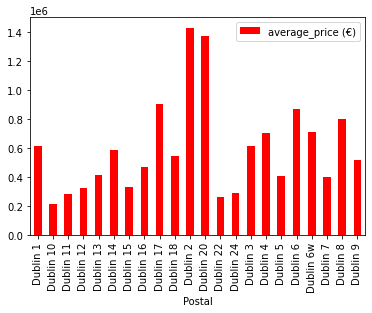

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

dataset1 = pd.read_csv(r"C:\Users\JAC\Documents\Helping_Leticia\Data analysis\ppr2019dublin.csv")

# Create the db engine
engine = create_engine('sqlite:///:memory:')

# Store the dataframe as a table
dataset1.to_sql('data_table', engine)

# Query 1 on the relational table (this gives is the index number)
res1 = pd.read_sql_query('SELECT * FROM data_table', engine)
#print('Result 1')
#print(res1)



# Query 2 on the relational table (summing up prices for each area code)
res2 = pd.read_sql_query('SELECT Postal,sum(Price) FROM data_table group by Postal', engine)
print('Result 2')
print(res2)



# This counts the different times each value in the Postal column occurs. it also writes it to a csv file.
Postal_Codes = res1['Postal'].value_counts()
print(Postal_Codes)
Postal_Codes.to_csv(r"C:\Users\JAC\Documents\Helping_Leticia\Data analysis\Area_codes.csv", encoding='utf-8')

#this changes the header in the file.
df = pd.read_csv(r"C:\Users\JAC\Documents\Helping_Leticia\Data analysis\Area_codes.csv")
new_header = ['Postal', 'count'] 
df.to_csv(r"C:\Users\JAC\Documents\Helping_Leticia\Data analysis\Area_codes.csv", header=new_header, encoding='utf-8')
Postal_Codes = pd.read_csv(r"C:\Users\JAC\Documents\Helping_Leticia\Data analysis\Area_codes.csv")
print(Postal_Codes)

#This merges the two dataframes so we can get the average
area_merge = pd.merge(res2, Postal_Codes, on='Postal')


#this calculates the average house price per area code.
area_merge['average_price (€)'] = area_merge['sum(Price)']/area_merge['count']

area_merge = area_merge.drop("Unnamed: 0", axis=1)

print(area_merge)


area_merge.plot(kind='bar',x='Postal',y='average_price (€)',color='red')
plt.show()